In [18]:
%load_ext autoreload
%autoreload 2

import cv2
from utils import get_video
import sys
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
_LIB_PATH = './function/src'
if not _LIB_PATH in sys.path:
    sys.path.append(_LIB_PATH)

In [3]:
from function.src.Dehaze import dehaze

In [4]:
# _VID_PATH = 'C:\\Users\\Admin\\working\\matlab\\ctcm\\tp2\\videos\\original_video.mp4'
# _VID_PATH = '../data/MontBlanc.mov'
# _VID_PATH = '../data/countryside.mp4'
_IMG_PATH = '../../data/test_gen_haze_1.jpg'

In [5]:
# get_video(_VID_PATH)

In [6]:
# vid_capture = cv2.VideoCapture(_VID_PATH)
# while(vid_capture.isOpened()):
#     ret, frame = vid_capture.read()
#     break
#     if ret == False:
#         break

# vid_capture.release()
# cv2.destroyAllWindows()

In [7]:
img = cv2.imread(_IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
config = {}
config['a'] = None
config['t'] = None
config['rt'] = None
config['tmin'] = 0.1
config['ps'] = 20
config['w'] = 0.95
config['px'] = 1e-3
config['r'] = 40
config['eps'] = 1e-3
config['m'] = True

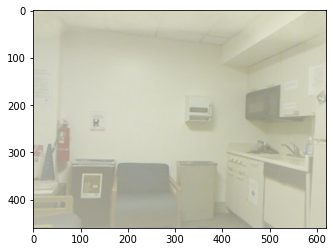

In [9]:
plt.imshow(img)

In [10]:
# impad = np.pad(frame, ((15//2,15//2), (15,15), (0,0)), 'edge')

In [11]:
# plt.imshow(impad)

In [12]:
oimg = dehaze(img, 
              config['a'], 
              config['t'], 
              config['rt'], 
              config['tmin'], 
              config['ps'], 
              config['w'], 
              config['px'], 
              config['r'], 
              config['eps'], 
              config['m'])

100%|███████████████████████████████████████████████████████████| 460/460 [00:01<00:00, 339.16it/s]


Atmospheric Light estimated.


100%|███████████████████████████████████████████████████████████| 460/460 [00:01<00:00, 390.86it/s]


Transmission estimated.


100%|████████████████████████████████████████████████████████████| 460/460 [00:19<00:00, 23.42it/s]


Transmission refined.


100%|████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 66.84it/s]

Radiance recovered.


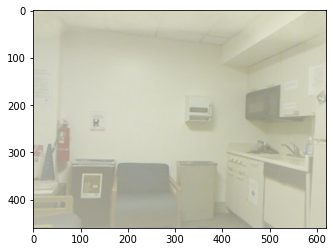

In [13]:
plt.imshow(img)

In [19]:
oimg_tensor = torch.tensor(oimg)
oimg_tensor = oimg_tensor.clamp(0,1).cpu()

In [21]:
oimg_array = oimg_tensor.numpy()
oimg_array.max(), oimg_array.min()

(1.0, 0.0)

In [22]:
img_dehaze = (oimg_array * 255).astype('uint8')

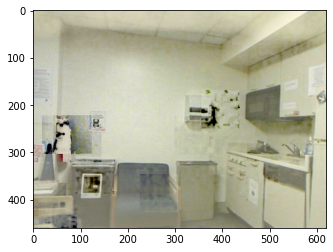

In [23]:
plt.imshow(img_dehaze)